In [1]:
#RFV not useful precipitation, use PRCP, RFV has all zero values
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

#dhy = pd.read_csv('C:/Users/shahi/Downloads/TxtInOut_APEX1501_exdata/TxtInOut/SITE14.DHY', delimiter=r'\s+', skiprows=8)
sad = pd.read_csv('C:/Users/shahi/Downloads/TxtInOut_APEX1501_modified/TxtInOut/SITE14.SAD', delimiter=r'\s+', skiprows=9)
#dhy.columns=dhy.columns.str.strip()
sad.columns=sad.columns.str.strip()
sad.columns

Index(['#', 'ID', 'Y', 'M', 'D', 'CPNM', 'HUI', 'LAI', 'RD', 'RW', 'BIOM',
       'STL', 'CPHT', 'STD', 'STDL', 'WS', 'NS', 'PS', 'KS', 'TS', 'AS',
       'SALT', 'REG', 'RSDC', 'RSPC', 'PRKC', 'QC', 'YC', 'FOC', 'SCOU',
       'DEPC', 'YCWN', 'CBUR', 'IRGA', 'QIN', 'TLGE', 'TLGW', 'TLGQ', 'TLGF',
       'EPP', 'RSQI', 'RSQO', 'RSEV', 'RSLK', 'DPRK', 'RSSF', 'QFP', 'QRF',
       'RFIC', 'RSBK', 'CPVH', 'CPVV', 'RFV', 'PSOQ', 'IRDL', 'WYLD', 'SW',
       'RSYO', 'RSYD', 'QRP', 'YRP', 'YNRP', 'YPRP', 'ZNH3', 'ZNO3', 'ZPML',
       'ZSK', 'UNM', 'UPM', 'UKM', 'RZSW', 'WTBL', 'GWST', 'STDO', 'RSD',
       'RSVQ', 'RSVY', 'RSSA', 'SWLT', 'SNO', 'RSDM', 'GWSN', 'ZSLT'],
      dtype='object')

In [9]:
# sub_dhy = dhy[dhy['ISA']==1]
# sub_dhy.rename(columns={'Y':'Year','M':'Month', 'D':'Day'},inplace=True)
# sub_dhy['DATE']=pd.to_datetime(sub_dhy[['Year','Month','Day']])
# sub_dhy['RFV_C']=sub_dhy['RFVmm'].cumsum()
# sub_dhy['Q_C']=sub_dhy['Qmm'].cumsum()*(-1)
# sub_dhy

sub_sad = sad[sad['#']==1]
sub_sad.rename(columns={'Y':'Year', 'M':'Month', 'D':'Day'}, inplace=True)
sub_sad['DATE'] = pd.to_datetime(sub_sad[['Year', 'Month', 'Day']])
# sub_sad['RFV_C']=sub_sad['RFV'].cumsum()
# sub_sad['PRCP_C']=sub_sad['PRCP'].cumsum()
# sub_sad['WYLD_C']=sub_sad['WYLD'].cumsum()
# sub_sad['INFLOW_C']=(sub_sad['IRGA']+sub_sad['DPRK']+sub_sad['RSSF']+sub_sad['PSOQ']+sub_sad['GWST']+sub_sad['SWLT']+sub_sad['SNO']).cumsum()
# sub_sad['OUTFLOW_C']=(sub_sad['ET']+sub_sad['SSF']+sub_sad['PRK']).cumsum()*(-1)


inflow_param = {'RSDC'}
outflow_param = {'RSPC','PRKC','QC','YC','SCOU','DEPC','YCWN','CBUR'}
#sub_sad['INFLOW_C']=sub_sad['PRCP']+sub_sad['SNOF']+sub_sad['SNOM']+sub_sad['PRK']
for var in inflow_param:
    sub_sad[f'{var}_C']=sub_sad[var].cumsum()
for var in outflow_param:
    sub_sad[f'{var}_C']=sub_sad[var].cumsum() * (-1)
# sub_sad['OUTFLOW_C']=sub_sad[]
#sub_sad['Q_C']=sub_sad['Q'].cumsum() * (-1)
pd.set_option('display.max_columns', None)
sub_sad.tail(1)

C:\Users\shahi\AppData\Local\Temp\ipykernel_11460\2608989107.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad.rename(columns={'Y':'Year', 'M':'Month', 'D':'Day'}, inplace=True)
C:\Users\shahi\AppData\Local\Temp\ipykernel_11460\2608989107.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad['DATE'] = pd.to_datetime(sub_sad[['Year', 'Month', 'Day']])
C:\Users\shahi\AppData\Local\Temp\ipykernel_11460\2608989107.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,#,ID,Year,Month,Day,CPNM,HUI,LAI,RD,RW,BIOM,STL,CPHT,STD,STDL,WS,NS,PS,KS,TS,AS,SALT,REG,RSDC,RSPC,PRKC,QC,YC,FOC,SCOU,DEPC,YCWN,CBUR,IRGA,QIN,TLGE,TLGW,TLGQ,TLGF,EPP,RSQI,RSQO,RSEV,RSLK,DPRK,RSSF,QFP,QRF,RFIC,RSBK,CPVH,CPVV,RFV,PSOQ,IRDL,WYLD,SW,RSYO,RSYD,QRP,YRP,YNRP,YPRP,ZNH3,ZNO3,ZPML,ZSK,UNM,UPM,UKM,RZSW,WTBL,GWST,STDO,RSD,RSVQ,RSVY,RSSA,SWLT,SNO,RSDM,GWSN,ZSLT,DATE,RSDC_C,QC_C,RSPC_C,YC_C,PRKC_C,SCOU_C,YCWN_C,CBUR_C,DEPC_C
15316,1,13,1999,12,31,SPAS,0.4643,0.7042,1.83,1.4702,3.6341,2.1639,0.5381,15.9689,0.2171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.94,1.7271,0.0,0.0,0.0000,8700.7197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2709,0.0,0.0,0.0,0.0,0.184,0.0,0.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0001,235.1818,0.0,0.0,0.0,0.0,0.0,0.0,5.9301,0.6776,188.069,0.0752,34.4936,14.7307,34.1057,235.1818,75.0,36.8241,0.01,2.6242,0.0,0.0,0.0,1.2993,0.0,1.5077,0.0,0.0,1999-12-31,3315.8783,-1.5929,-4734.9548,,-13.7581,-0.0,-0.0,-0.0,-0.0


In [27]:
#Storage changes
storage_param={'SW','GWST','RSVQ','SWLT','SNO'}
for var in storage_param:
     sub_sad[f'{var}_DIF']=sub_sad[var].diff().cumsum()
sub_sad.tail(1)

C:\Users\shahi\AppData\Local\Temp\ipykernel_14976\643763870.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad[f'{var}_DIF']=sub_sad[var].diff().cumsum()


,#,ID,Year,Month,Day,CPNM,HUI,LAI,RD,RW,BIOM,STL,CPHT,STD,STDL,WS,NS,PS,KS,TS,AS,SALT,REG,PRCP,SNOF,SNOM,PET,ET,EP,Q,SSF,PRK,QDR,IRGA,QIN,TLGE,TLGW,TLGQ,TLGF,EPP,RSQI,RSQO,RSEV,RSLK,DPRK,RSSF,QFP,QRF,RFIC,RSBK,CPVH,CPVV,RFV,PSOQ,IRDL,WYLD,SW,RSYO,RSYD,QRP,YRP,YNRP,YPRP,ZNH3,ZNO3,ZPML,ZSK,UNM,UPM,UKM,RZSW,WTBL,GWST,STDO,RSD,RSVQ,RSVY,RSSA,SWLT,SNO,RSDM,GWSN,ZSLT,DATE,RSSF_C,PRCP_C,PRK_C,SNOM_C,DPRK_C,EP_C,ET_C,QRF_C,Q_C,SW_DIF,SWLT_DIF,RSVQ_DIF,GWST_DIF,SNO_DIF
15316,1,13,1999,12,31,SPAS,0.4958,1.0095,1.8296,2.1387,6.4115,4.2728,0.2674,19.5808,1.1103,0.9976,0.0247,1.0,1.0,0.2839,1.0,1.0,0.0247,0.0,0.0,0.0,2.3442,0.7939,0.7935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.7754,0.0,0.0,0.0,0.0,0.0,0.0,3.3775,0.0,162.3752,0.0,15.2431,35.3257,91.642,106.7754,75.0,0.0018,0.01,5.5512,0.0,0.0,0.0,2.7239,0.0,2.5303,0.0000,0.0,1999-12-31,110.4292,2885.58,189.2733,42.6503,-145.8705,-1394.4112,-1914.8718,-0.0408,-781.1738,-2.1712,2.7239,0.0,-452.4169,0.0


C:\Users\shahi\AppData\Local\Temp\ipykernel_11460\1387066930.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20',n_lines)


<function matplotlib.pyplot.show(close=None, block=None)>

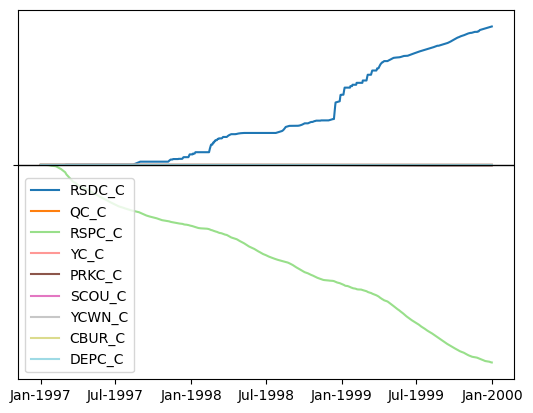

In [11]:
import matplotlib.cm as cm
fig,ax=plt.subplots()
n_lines = len(sub_sad.columns[84:])
colors = cm.get_cmap('tab20',n_lines)
for i, var in enumerate(sub_sad.columns[84:]):
    plt.plot(sub_sad['DATE'], sub_sad[var], color=colors(i), label=var)
    #plt.errorbar(sub_sad['DATE'], sub_sad[var], ls="None")
#plt.plot(sub_sad['DATE'], sub_sad['PRCP_C'])
plt.xticks
plt.axhline(y=0, linewidth=1, color='k')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.legend(sub_sad.columns[84:])
plt.show

C:\Users\shahi\AppData\Local\Temp\ipykernel_14976\3579123586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad['INFLOW']=sub_sad['PRCP']+sub_sad['SNOM']+sub_sad['PRK']+sub_sad['RSSF']
C:\Users\shahi\AppData\Local\Temp\ipykernel_14976\3579123586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad['OUTFLOW']=sub_sad['ET']+sub_sad['EP']+sub_sad['Q']+sub_sad['DPRK']+sub_sad['QRF']
C:\Users\shahi\AppData\Local\Temp\ipykernel_14976\3579123586.py:3: SettingWithCopyWarning: 
A value is trying to b

<function matplotlib.pyplot.show(close=None, block=None)>

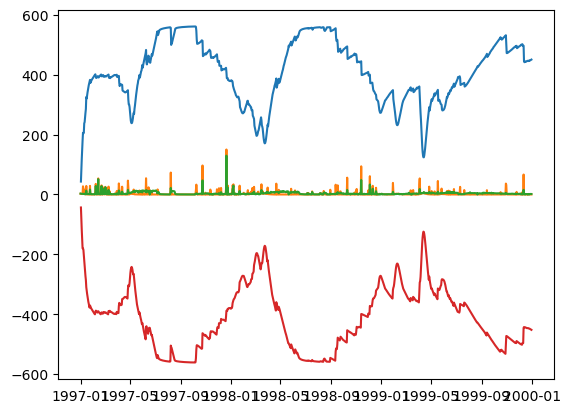

In [45]:
sub_sad['INFLOW']=sub_sad['PRCP']+sub_sad['SNOM']+sub_sad['PRK']+sub_sad['RSSF']
sub_sad['OUTFLOW']=sub_sad['ET']+sub_sad['EP']+sub_sad['Q']+sub_sad['DPRK']+sub_sad['QRF']
sub_sad['DIFF_STOR']= sub_sad['SW_DIF']+sub_sad['SWLT_DIF']+sub_sad['GWST_DIF']+sub_sad['RSVQ_DIF']+sub_sad['SNO_DIF']
sub_sad['RESIDUAL']=sub_sad['INFLOW']-sub_sad['OUTFLOW']-sub_sad['DIFF_STOR']
plt.plot(sub_sad['DATE'], sub_sad['RESIDUAL'], label="residual")
plt.plot(sub_sad['DATE'], sub_sad['INFLOW'])
plt.plot(sub_sad['DATE'], sub_sad['OUTFLOW'])
plt.plot(sub_sad['DATE'], sub_sad['DIFF_STOR'])
plt.show

In [61]:
inflow = {'PRCP','SNOF','SNOM','IRGA','QIN', 'RSQI', 'RSSF','RFV','PSOQ','RFIC'}
outflow = {'PET','ET','EP','Q','SSF','PRK','QDR','TLGE','TLGW', 'TLGQ','TLGF','EPP',
                 'RSQO','RSLK','DPRK','QFP','QRF','CPVH','CPVV','IRDL','WYLD'}
storage = {'RSEV','RSBK','SW','RZSW','GWST','RSVQ','SWLT','SNO'}

sub_sad = sad[sad['#']==1]
sub_sad.rename(columns={'Y':'Year', 'M':'Month', 'D':'Day'}, inplace=True)
sub_sad['DATE'] = pd.to_datetime(sub_sad[['Year', 'Month', 'Day']])

#sub_sad['INFLOW_C']=sub_sad['PRCP']+sub_sad['SNOF']+sub_sad['SNOM']+sub_sad['PRK']
for var in inflow:
    sub_sad[f'{var}_C']=sub_sad[var].cumsum()
for var in outflow:
    sub_sad[f'{var}_C']=sub_sad[var].cumsum() * (-1)
for var in storage:
     sub_sad[f'{var}_DIF']=sub_sad[var].diff().cumsum()
# sub_sad['OUTFLOW_C']=sub_sad[]
#sub_sad['Q_C']=sub_sad['Q'].cumsum() * (-1)
pd.set_option('display.max_columns', None)
sub_sad.tail(1)

C:\Users\shahi\AppData\Local\Temp\ipykernel_14976\4049812197.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad.rename(columns={'Y':'Year', 'M':'Month', 'D':'Day'}, inplace=True)
C:\Users\shahi\AppData\Local\Temp\ipykernel_14976\4049812197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad['DATE'] = pd.to_datetime(sub_sad[['Year', 'Month', 'Day']])
C:\Users\shahi\AppData\Local\Temp\ipykernel_14976\4049812197.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,#,ID,Year,Month,Day,CPNM,HUI,LAI,RD,RW,BIOM,STL,CPHT,STD,STDL,WS,NS,PS,KS,TS,AS,SALT,REG,PRCP,SNOF,SNOM,PET,ET,EP,Q,SSF,PRK,QDR,IRGA,QIN,TLGE,TLGW,TLGQ,TLGF,EPP,RSQI,RSQO,RSEV,RSLK,DPRK,RSSF,QFP,QRF,RFIC,RSBK,CPVH,CPVV,RFV,PSOQ,IRDL,WYLD,SW,RSYO,RSYD,QRP,YRP,YNRP,YPRP,ZNH3,ZNO3,ZPML,ZSK,UNM,UPM,UKM,RZSW,WTBL,GWST,STDO,RSD,RSVQ,RSVY,RSSA,SWLT,SNO,RSDM,GWSN,ZSLT,DATE,IRGA_C,PRCP_C,RFIC_C,QIN_C,RFV_C,SNOF_C,PSOQ_C,RSSF_C,SNOM_C,RSQI_C,QFP_C,TLGQ_C,ET_C,TLGE_C,TLGW_C,RSLK_C,QRF_C,IRDL_C,TLGF_C,RSQO_C,PET_C,DPRK_C,PRK_C,CPVV_C,CPVH_C,Q_C,EPP_C,SSF_C,WYLD_C,EP_C,QDR_C,SW_DIF,RSVQ_DIF,SWLT_DIF,RSEV_DIF,RZSW_DIF,GWST_DIF,RSBK_DIF,SNO_DIF
15316,1,13,1999,12,31,SPAS,0.4958,1.0095,1.8296,2.1387,6.4115,4.2728,0.2674,19.5808,1.1103,0.9976,0.0247,1.0,1.0,0.2839,1.0,1.0,0.0247,0.0,0.0,0.0,2.3442,0.7939,0.7935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.7754,0.0,0.0,0.0,0.0,0.0,0.0,3.3775,0.0,162.3752,0.0,15.2431,35.3257,91.642,106.7754,75.0,0.0018,0.01,5.5512,0.0,0.0,0.0,2.7239,0.0,2.5303,0.0000,0.0,1999-12-31,0.0,2885.58,0.0,0.0,0.0,45.439,0.0,110.4292,42.6503,0.0,-0.0,-0.0,-1914.8718,-0.0,-0.0,-0.0,-0.0408,-0.0,-0.0,-0.0,-4669.4764,-145.8705,-189.2733,-0.0,-0.0,-781.1738,-2203.3922,-0.0,-891.6444,-1394.4112,-0.0,-2.1712,0.0,2.7239,0.0,-2.1712,-452.4169,0.0,0.0
